Library Import

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=11ea8b026c90a02e0400c8cfa1a5a6dd787cc8e26b325afa4dca5a7c6c933a7b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import pandas as pd
import numpy as np
import time
#import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #visualization library that is commonly used for data science and machine learning tasks
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#import lime
#import lime.lime_tabular

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

https://www.kaggle.com/code/essammohamed4320/intrusion-detection-system-with-ml-dl

https://www.kaggle.com/code/eduardohasbun/machine-learning-intrusion-detection-system

https://www.kaggle.com/code/iamyajat/intrusion-detection-system-using-neural-networks

https://www.kaggle.com/code/sripadkarthik/iot-data-for-intrusion-detection-using-ml-and-dl

https://www.kaggle.com/code/sanketrai/network-intrusion-detection

https://www.kaggle.com/code/wailinnoo/intrusion-detection-system-using-kdd99-dataset

https://www.kaggle.com/code/eduardohasbun/machine-learning-intrusion-detection-system

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Dataset**

In [ ]:
data_file = pd.read_csv("drive/MyDrive/IIOT/DNN.csv", header=0)

<ipython-input-2-b61f58f87909>:1: DtypeWarning: Columns (2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data_file = pd.read_csv("drive/MyDrive/IIOT/DNN.csv", header=0)


In [ ]:
df = data_file.copy() # Create a copy of the 'data_file' DataFrame and store it in a new DataFrame 'df'

In [ ]:
data_file.head() # Display the first few rows of the 'data_file' DataFrame

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [ ]:
data_file.shape

(2219201, 63)

In [ ]:
sns.set(font_scale=1.2)


[Text(0.5, 1.0, 'Attack Count')]

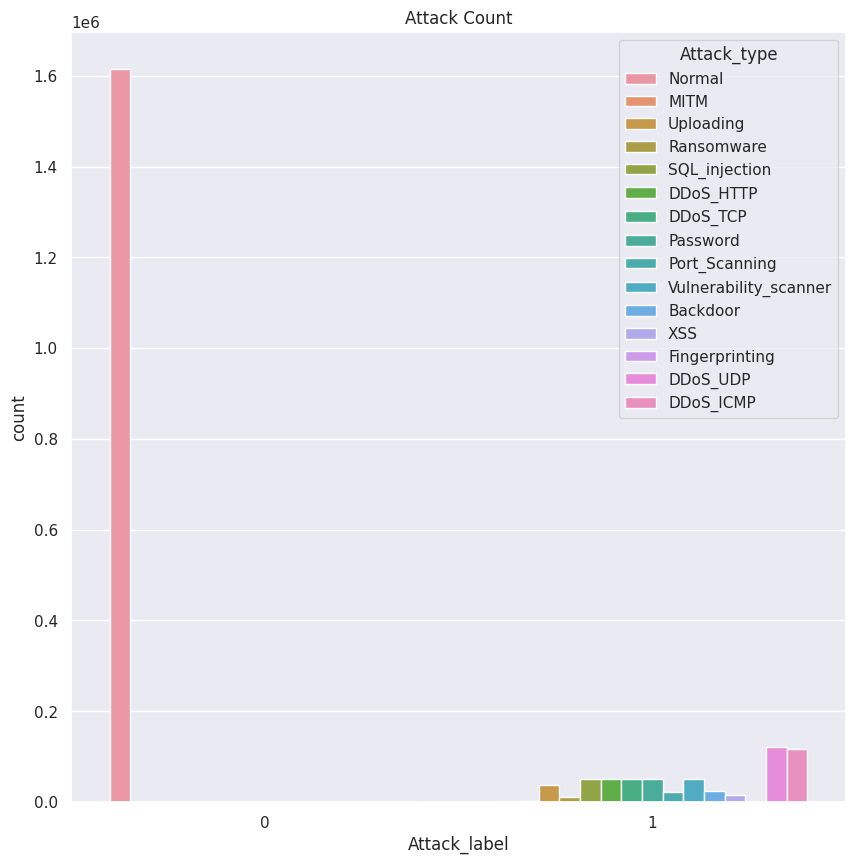

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="Attack_label", hue="Attack_type").set(title='Attack Count')


In [ ]:
df['Attack_type'].unique()


array(['Normal', 'MITM', 'Uploading', 'Ransomware', 'SQL_injection',
       'DDoS_HTTP', 'DDoS_TCP', 'Password', 'Port_Scanning',
       'Vulnerability_scanner', 'Backdoor', 'XSS', 'Fingerprinting',
       'DDoS_UDP', 'DDoS_ICMP'], dtype=object)

In [ ]:
df['Attack_type'].nunique()


15

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=8, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 8)
    plt.show()

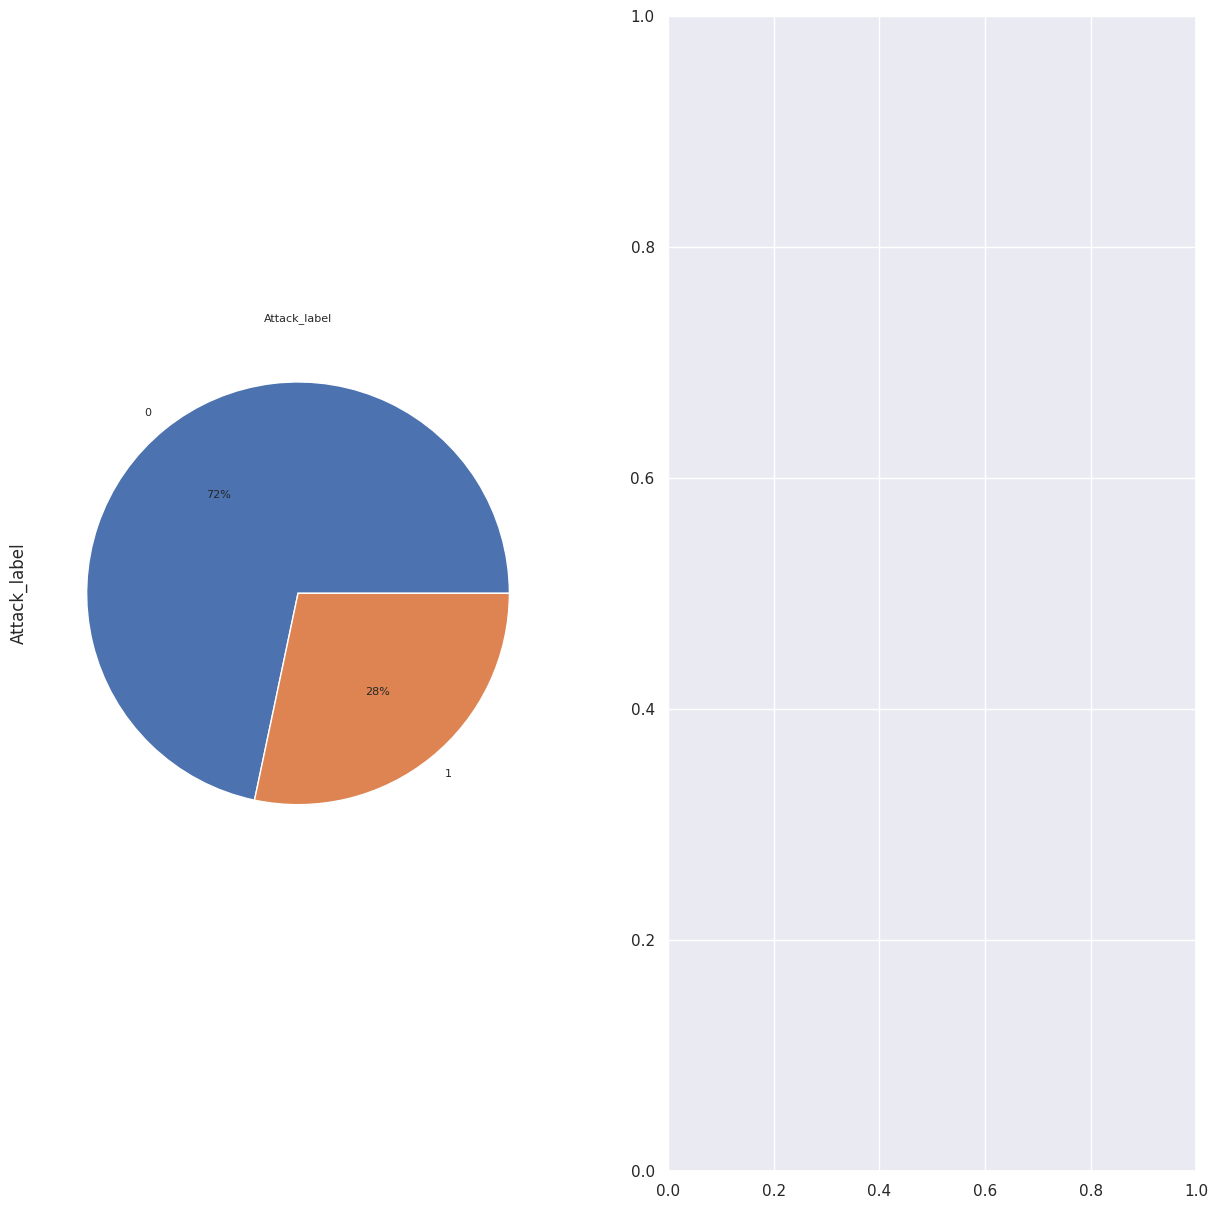

In [ ]:
pie_plot(df, ['Attack_label'], 1, 2)

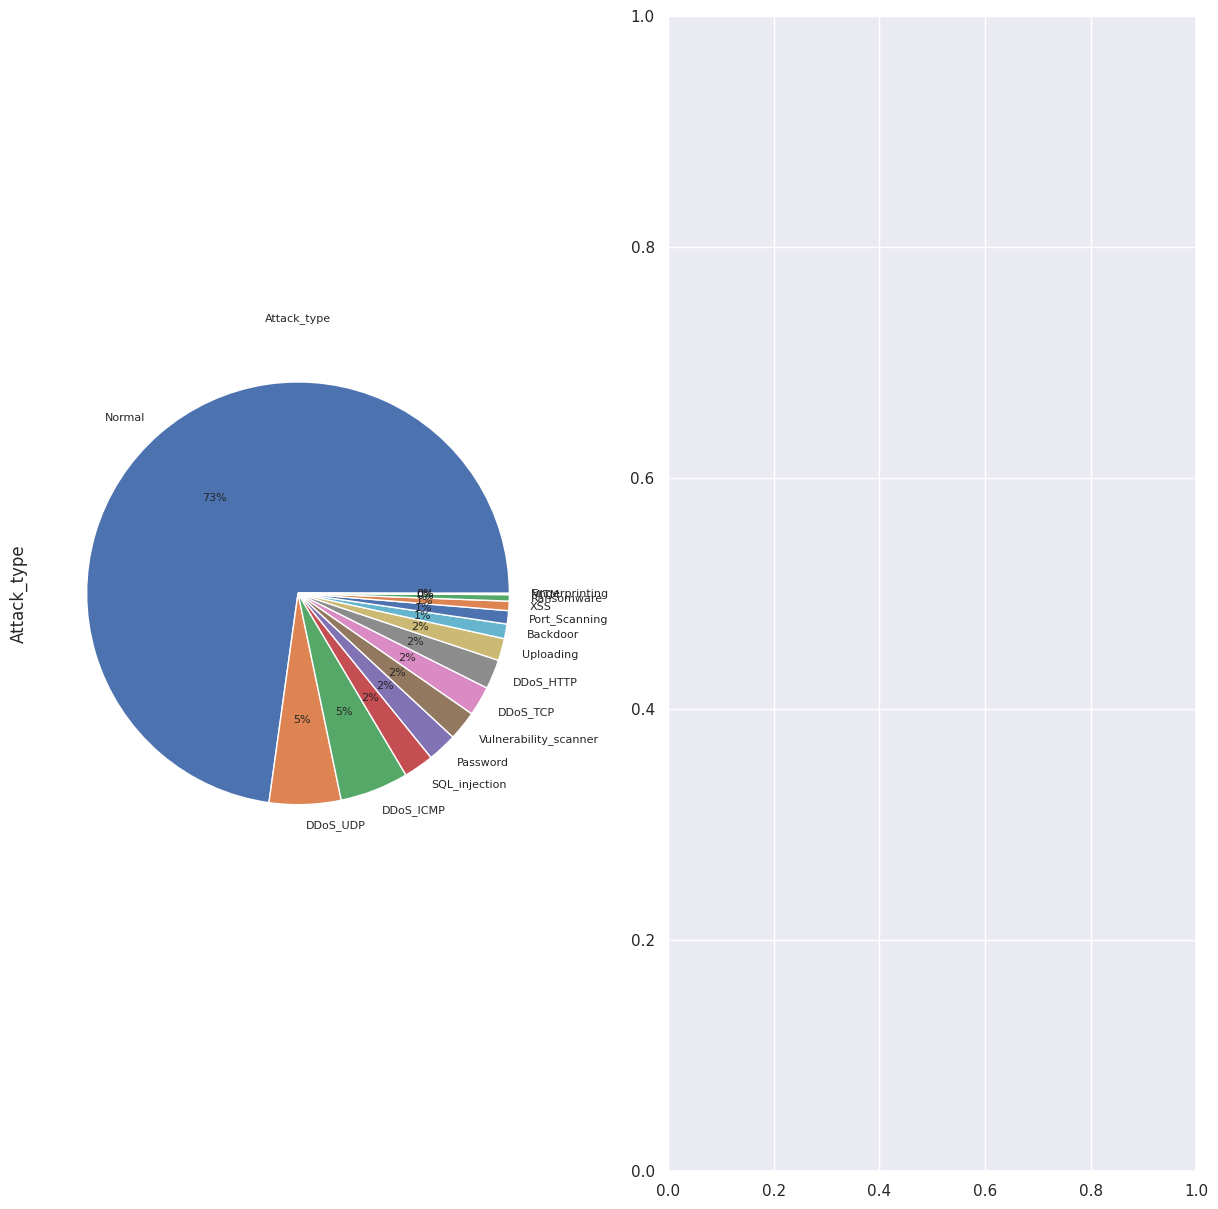

In [ ]:
#pie_plot(df, ['Attack_type'], 1, 2)

[Text(0.5, 1.0, 'Attacks and subtypes')]

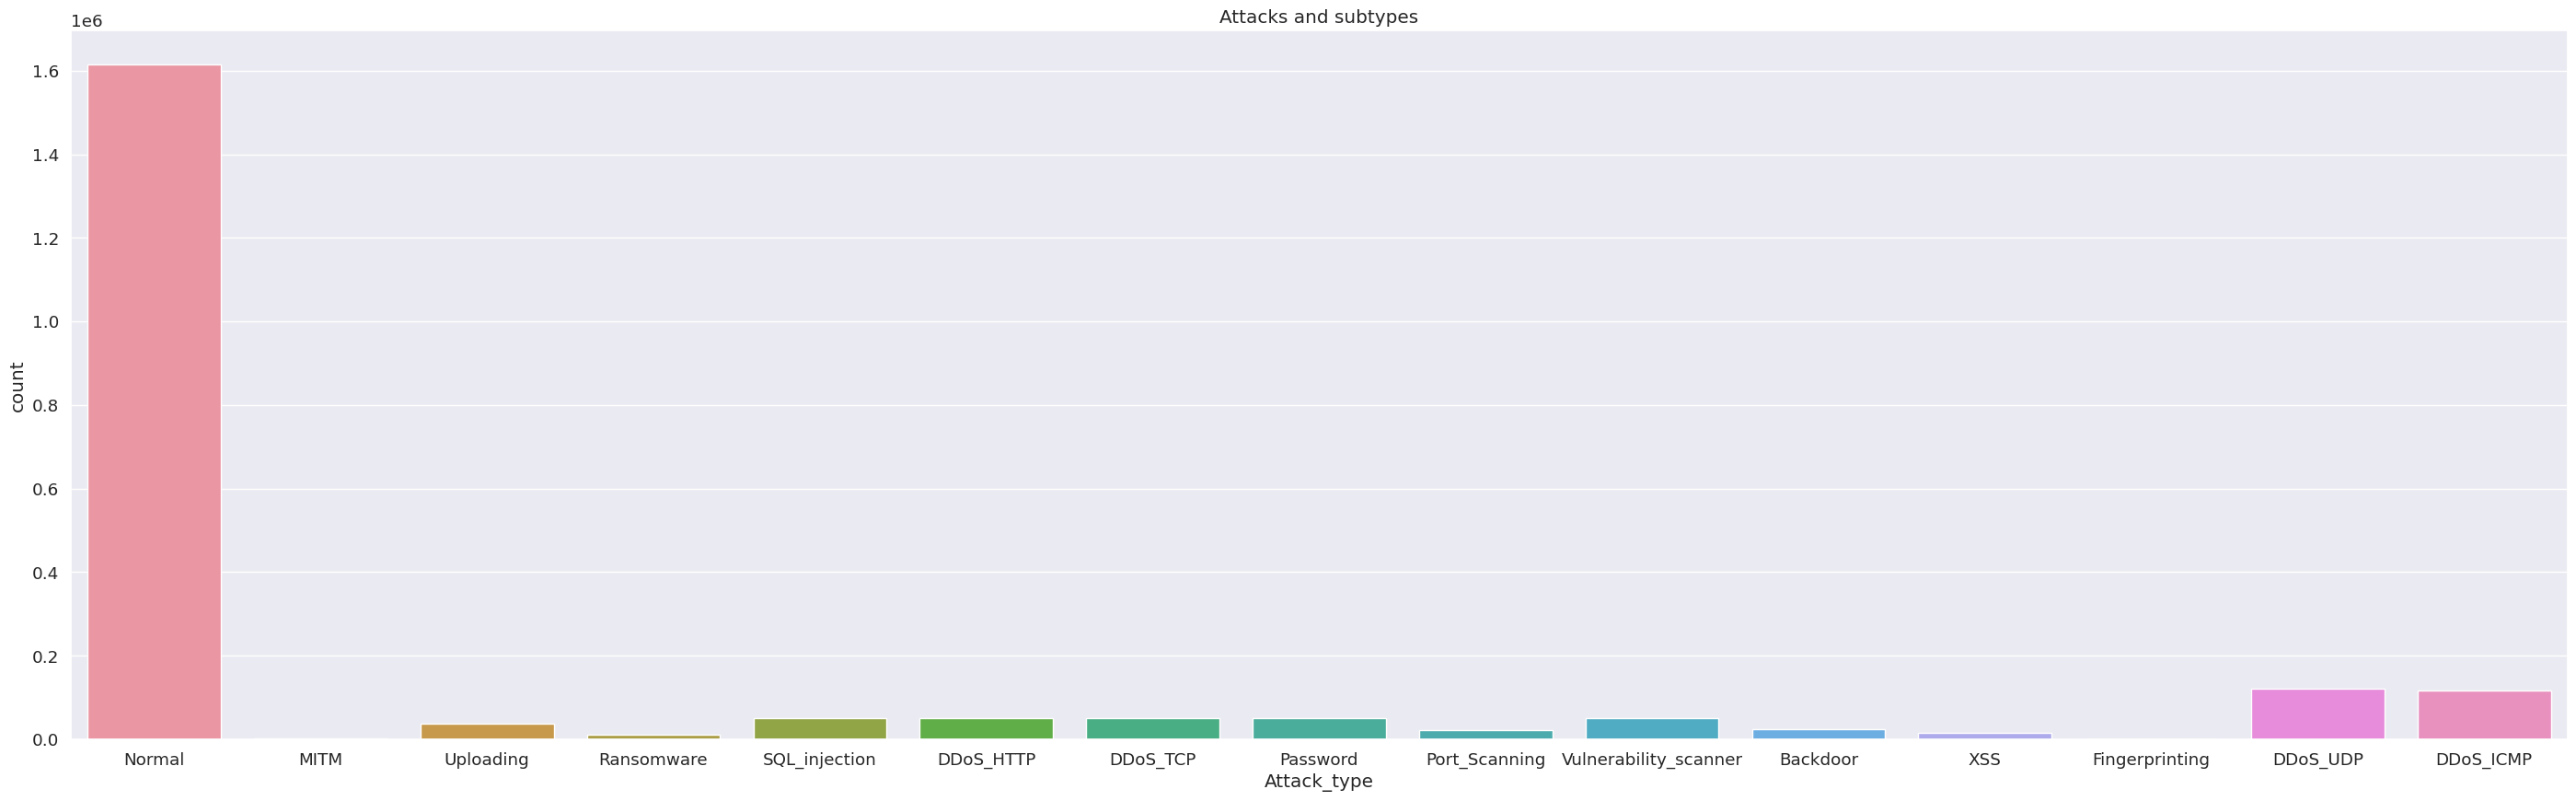

In [ ]:
plt.figure(figsize=(35,10))
sns.countplot(x=df['Attack_type']).set(title='Attacks and subtypes')


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

**Preprocessing**

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
# Import necessary libraries

from sklearn.utils import shuffle

# Define a list of columns to be dropped from the DataFrame
drop_columns = ["Attack_type", "frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4",
                "arp.dst.proto_ipv4", "http.file_data", "http.request.full_uri", "icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options", "tcp.payload", "tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg"]
# Drop the specified columns from the DataFrame
df.drop(drop_columns, axis=1, inplace=True)
# Remove rows with any missing (NaN) values from the DataFrame
df.dropna(axis=0, how='any', inplace=True)
# Remove duplicate rows from the DataFrame, keeping only the first occurrence
df.drop_duplicates(subset=None, keep="first", inplace=True)
# Shuffle the rows of the DataFrame to introduce randomness
df = shuffle(df)
# Check for missing values in the DataFrame and display the counts per column
df.isna().sum()
# Display the count of unique values in the 'Attack_label' column
print(df['Attack_label'].value_counts())

0    1380858
1     545052
Name: Attack_label, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925910 entries, 1660909 to 276264
Data columns (total 47 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   arp.opcode                 float64
 1   arp.hw.size                float64
 2   icmp.checksum              float64
 3   icmp.seq_le                float64
 4   icmp.unused                float64
 5   http.content_length        float64
 6   http.request.method        object 
 7   http.referer               object 
 8   http.request.version       object 
 9   http.response              float64
 10  http.tls_port              float64
 11  tcp.ack                    float64
 12  tcp.ack_raw                float64
 13  tcp.checksum               float64
 14  tcp.connection.fin         float64
 15  tcp.connection.rst         float64
 16  tcp.connection.syn         float64
 17  tcp.connection.synack      float64
 18  tcp.flags                  float64
 19  tcp.flags.ack              float64
 2

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

# Define a function to perform one-hot encoding on categorical columns
def encode_text_dummy(df, name):
    # Use pd.get_dummies to create dummy variables for the specified column 'name'
    dummies = pd.get_dummies(df[name])
    # Iterate through the generated dummy columns and rename them to include the original column name
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    # Remove the original column 'name' from the DataFrame
    df.drop(name, axis=1, inplace=True)
# Apply the 'encode_text_dummy' function to one-hot encode several categorical columns in the 'df' DataFrame
encode_text_dummy(df,'http.request.method')

encode_text_dummy(df,'http.referer')

encode_text_dummy(df,"http.request.version")

encode_text_dummy(df,"dns.qry.name.len")

encode_text_dummy(df,"mqtt.conack.flags")

encode_text_dummy(df,"mqtt.protoname")

encode_text_dummy(df,"mqtt.topic")

In [ ]:
df

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0.0,mqtt.protoname-0,mqtt.protoname-MQTT,mqtt.topic-0.0,mqtt.topic-0,mqtt.topic-Temperature_and_Humidity
1245344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000e+00,2.162137e+09,...,0,0,0,0,0,1,0,0,1,0
846930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,7.432731e+08,...,0,0,0,0,0,1,0,0,1,0
1769152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.210000e+02,1.061562e+09,...,0,0,0,0,0,0,0,0,0,0
1867520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.996611e+09,1.996611e+09,...,0,0,0,0,0,0,0,0,0,0
565930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.460890e+05,2.371971e+09,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.500000e+01,1.011134e+09,...,0,0,0,0,0,1,0,0,1,0
820847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000e+00,3.231173e+09,...,0,0,0,0,0,1,0,0,1,0
588284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.056987e+08,1.244551e+09,...,0,0,0,0,0,1,0,0,1,0
1247488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
df.shape

(1925910, 96)

In [ ]:
df.describe()


,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,tcp.ack_raw,...,mqtt.conack.flags-1471198,mqtt.conack.flags-1471199,mqtt.conack.flags-1574358,mqtt.conack.flags-1574359,mqtt.protoname-0.0,mqtt.protoname-0,mqtt.protoname-MQTT,mqtt.topic-0.0,mqtt.topic-0,mqtt.topic-Temperature_and_Humidity
count,1.925910e+06,1.925910e+06,1.925910e+06,1.925910e+06,1925910.0,1.925910e+06,1.925910e+06,1925910.0,1.925910e+06,1.925910e+06,...,1.925910e+06,1.925910e+06,1.925910e+06,1.925910e+06,1.925910e+06,1.925910e+06,1.925910e+06,1.925910e+06,1.925910e+06,1.925910e+06
mean,1.401935e-05,5.607739e-05,1.166042e+03,1.351843e+03,0.0,5.540462e+00,1.692862e-02,0.0,2.624963e+07,1.712849e+09,...,1.038470e-06,1.038470e-06,4.673116e-06,4.673116e-06,2.833985e-03,6.738840e-01,4.310586e-02,2.833985e-03,6.738856e-01,4.310430e-02
std,4.833776e-03,1.834288e-02,7.040939e+03,7.544654e+03,0.0,1.034849e+02,1.290041e-01,0.0,1.767548e+08,1.301941e+09,...,1.019053e-03,1.019053e-03,2.161735e-03,2.161735e-03,5.315971e-02,4.687904e-01,2.030955e-01,5.315971e-02,4.687898e-01,2.030919e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.000000e+00,4.554452e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,6.000000e+00,1.681297e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,1.080000e+02,2.620366e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,2.000000e+00,6.000000e+00,6.553300e+04,6.553500e+04,0.0,8.365500e+04,1.000000e+00,0.0,3.949529e+09,4.294947e+09,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

data = df.drop("Attack_label",axis=1)
target = df["Attack_label"]

x_train, x_test, y_train, y_test = train_test_split(data, target,test_size=0.2, random_state = 50)

In [ ]:
print('x_train',x_train)
print('x_test',x_test)
print('y_train',y_train)
print('y_test',y_test)

x_train          arp.opcode  arp.hw.size  icmp.checksum  icmp.seq_le  icmp.unused  \
1677268         0.0          0.0            0.0          0.0          0.0   
1795370         0.0          0.0            0.0          0.0          0.0   
1218763         0.0          0.0            0.0          0.0          0.0   
321397          0.0          0.0            0.0          0.0          0.0   
1819745         0.0          0.0            0.0          0.0          0.0   
...             ...          ...            ...          ...          ...   
2100453         0.0          0.0            0.0          0.0          0.0   
152458          0.0          0.0            0.0          0.0          0.0   
2109097         0.0          0.0        26285.0      19274.0          0.0   
1022319         0.0          0.0            0.0          0.0          0.0   
436030          0.0          0.0            0.0          0.0          0.0   

         http.content_length  http.response  http.tls_port       tc

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)  # Create an instance of the encoder
x_train_encoded = encoder.fit_transform(x_train)  # Encode the training data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),class_names=['MEDV'], verbose=True, mode='regression')

In [ ]:
#exp = explainer_lime.explain_instance(x_train.iloc[1,:],xgb_model.predict_proba, num_features=4)
#https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-lime
#https://www.kaggle.com/code/prashant111/explain-your-model-predictions-with-shapley-values
#https://www.kaggle.com/code/dansbecker/shap-values

**Deep Learning Model**



https://www.kaggle.com/code/rafetcan/recurrent-neural-n-rnn-tutorial-for-beginners/notebook

https://www.kaggle.com/code/rafetcan/long-short-term-memory-n-lstm-for-beginners


**LSTM**

In [ ]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
x_train.shape[1]

95

https://github.com/trajceskijovan/Timeseries-anomaly-detection-using-LSTM/blob/main/Timeseries%20anomaly%20detection%20using%20LSTM.ipynb

In [ ]:
# Train model
#from tensorflow.keras.callbacks import EarlyStopping

In [ ]:

#early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
#lsm = model.fit(x_train, y_train, epochs=1000, batch_size=16, validation_split=0.1,callbacks=[early_stop])
#lsm

In [ ]:
# The LSTM architecture
lsm = Sequential()
# First LSTM layer with Dropout regularisation
lsm.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
lsm.add(Dropout(0.2))
# Second LSTM layer
lsm.add(LSTM(units=50, return_sequences=True))
lsm.add(Dropout(0.2))
# Third LSTM layer
lsm.add(LSTM(units=50, return_sequences=True))
lsm.add(Dropout(0.2))
# Fourth LSTM layer
lsm.add(LSTM(units=50))
lsm.add(Dropout(0.2))
# The output layer
lsm.add(Dense(units=1))

# Compiling the RNN
lsm.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# Define model architecture
from keras.layers import Activation
lsm = Sequential()

lsm.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
lsm.add(Dropout(0.2))

lsm.add(LSTM(units = 50, return_sequences = True))
lsm.add(Dropout(0.2))

lsm.add(LSTM(units = 50, return_sequences = True))
lsm.add(Dropout(0.2))

lsm.add(LSTM(units = 50))
lsm.add(Dropout(0.2))

#lsm.add(Dense(units=1, activation='softmax'))
#lsm.add(Dense(units = 1))


In [ ]:

lsm.compile(optimizer= 'adam', loss = "mean_squared_error")

In [ ]:
epochs = 4
batch_size = 1000

In [ ]:
start_time=time.time()
lsm.fit(x_train, y_train, epochs = epochs, batch_size = batch_size)
end_time=time.time()
training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))


Epoch 1/4
1541/1541 [==============================] - 83s 48ms/step - loss: 0.0057
Epoch 2/4
1541/1541 [==============================] - 74s 48ms/step - loss: 0.0012
Epoch 3/4
1541/1541 [==============================] - 74s 48ms/step - loss: 0.0011
Epoch 4/4
1541/1541 [==============================] - 74s 48ms/step - loss: 0.0021
time complexity :333.471 


In [ ]:
#x_test = np.array(x_test)

In [ ]:
predict = lsm.predict(x_test).round()
ytrain_pred=lsm.predict(x_train).round()
print("predicted value",predict)
print("actual  value",y_test)


# # now to find confusion matric




48148/48148 [==============================] - 355s 7ms/step
predicted value [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
actual  value 421626     0
1160808    0
419115     0
1796415    1
1320764    0
          ..
396990     0
709383     0
225215     0
97040      0
1411492    0
Name: Attack_label, Length: 385182, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

# Convert predict to a binary label array

print("accuracy  train time in LSTM ",accuracy_score(y_train, ytrain_pred))
print("accuracy  test time in LSTM",accuracy_score(y_test, predict))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predict)
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predict))

accuracy  train time in LSTM  1.0
accuracy  test time in LSTM 1.0
[[275899      0]
 [     0 109283]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    275899
           1       1.00      1.00      1.00    109283

    accuracy                           1.00    385182
   macro avg       1.00      1.00      1.00    385182
weighted avg       1.00      1.00      1.00    385182



In [ ]:
num_classes = cm.shape[0]

# Initialize arrays to store results
true_negatives = np.zeros(num_classes, dtype=int)
false_negatives = np.zeros(num_classes, dtype=int)
true_positives = np.zeros(num_classes, dtype=int)
false_positives = np.zeros(num_classes, dtype=int)

# Calculate TN, FN, TP, FP for each class
for i in range(num_classes):
    # True Negatives (TN) for class i
    mask = np.ones(num_classes, dtype=bool)
    mask[i] = False
    true_negatives[i] = np.sum(cm[mask][:, mask])

    # False Negatives (FN) for class i
    false_negatives[i] = np.sum(cm[i, :]) - cm[i, i]

    # True Positives (TP) for class i
    true_positives[i] = cm[i, i]

    # False Positives (FP) for class i
    false_positives[i] = np.sum(cm[:, i]) - cm[i, i]

# Calculate False Alarm Rate (FAR) for each class
false_alarm_rate = false_positives / (false_positives + true_negatives)

# Calculate total False Alarm Rate (FAR)
total_false_alarm_rate = np.sum(false_positives) / np.sum(false_positives + true_negatives)

# Print results
print("True Negatives for each class:", true_negatives)
print("False Negatives for each class:", false_negatives)
print("True Positives for each class:", true_positives)
print("False Positives for each class:", false_positives)
print("False Alarm Rate (FAR) for each class:", false_alarm_rate)
print("Total False Alarm Rate (FAR) for all classes combined:", total_false_alarm_rate)

True Negatives for each class: [109283 275899]
False Negatives for each class: [0 0]
True Positives for each class: [275899 109283]
False Positives for each class: [0 0]
False Alarm Rate (FAR) for each class: [0. 0.]
Total False Alarm Rate (FAR) for all classes combined: 0.0


In [ ]:
#Mean squared error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
MSE =mean_squared_error(y_test, predict)
print('MSE',MSE)

    #Root Mean squared error
RMSE = math.sqrt(MSE)
print('RMSE',RMSE)

    #Mean absolute error
MAE =mean_absolute_error(y_test, predict)
print('MAE',MAE)

MSE 0.0004880809591310082
RMSE 0.022092554382212307
MAE 0.0004880809591310082


**Recurrent Neural N. (RNN)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

In [ ]:
rnn = Sequential()

rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (x_train.shape[1],1)))
rnn.add(Dropout(0.2))

rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
rnn.add(Dropout(0.2))

rnn.add(SimpleRNN(units = 50))
rnn.add(Dropout(0.2))

rnn.add(Dense(units = 1))

In [ ]:
rnn.compile(optimizer= "adam", loss = "mean_squared_error")

In [ ]:
epochs = 4
batch_size = 1000

In [ ]:
start_time=time.time()
rnn.fit(x_train, y_train, epochs = epochs, batch_size = batch_size)
end_time=time.time()
training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))


Epoch 1/4
1541/1541 [==============================] - 552s 354ms/step - loss: 0.0181
Epoch 2/4
1541/1541 [==============================] - 552s 358ms/step - loss: 0.0015
Epoch 3/4
1541/1541 [==============================] - 532s 345ms/step - loss: 0.0012
Epoch 4/4
1541/1541 [==============================] - 537s 348ms/step - loss: 0.0012
time complexity :2179.438 


In [ ]:
predict = rnn.predict(x_test).round()
ytrain_pred=rnn.predict(x_train).round()
print("predicted value",predict)
print("actual  value",y_test)

48148/48148 [==============================] - 1743s 36ms/step
predicted value [[-0.]
 [ 1.]
 [ 1.]
 ...
 [-0.]
 [-0.]
 [-0.]]
actual  value 728945     0
2036807    1
1907943    1
1970722    1
248380     0
          ..
1749260    1
1793766    1
176501     0
547525     0
760818     0
Name: Attack_label, Length: 385182, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

# Convert predict to a binary label array

print("accuracy  train time in RNN ",accuracy_score(y_train, ytrain_pred))
print("accuracy  test time in RNN",accuracy_score(y_test, predict))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predict)
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predict))

accuracy  train time in RNN  1.0
accuracy  test time in RNN 1.0
[[276642      0]
 [     0 108540]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276642
           1       1.00      1.00      1.00    108540

    accuracy                           1.00    385182
   macro avg       1.00      1.00      1.00    385182
weighted avg       1.00      1.00      1.00    385182



In [ ]:
num_classes = cm.shape[0]

# Initialize arrays to store results
true_negatives = np.zeros(num_classes, dtype=int)
false_negatives = np.zeros(num_classes, dtype=int)
true_positives = np.zeros(num_classes, dtype=int)
false_positives = np.zeros(num_classes, dtype=int)

# Calculate TN, FN, TP, FP for each class
for i in range(num_classes):
    # True Negatives (TN) for class i
    mask = np.ones(num_classes, dtype=bool)
    mask[i] = False
    true_negatives[i] = np.sum(cm[mask][:, mask])

    # False Negatives (FN) for class i
    false_negatives[i] = np.sum(cm[i, :]) - cm[i, i]

    # True Positives (TP) for class i
    true_positives[i] = cm[i, i]

    # False Positives (FP) for class i
    false_positives[i] = np.sum(cm[:, i]) - cm[i, i]

# Calculate False Alarm Rate (FAR) for each class
false_alarm_rate = false_positives / (false_positives + true_negatives)

# Calculate total False Alarm Rate (FAR)
total_false_alarm_rate = np.sum(false_positives) / np.sum(false_positives + true_negatives)

# Print results
print("True Negatives for each class:", true_negatives)
print("False Negatives for each class:", false_negatives)
print("True Positives for each class:", true_positives)
print("False Positives for each class:", false_positives)
print("False Alarm Rate (FAR) for each class:", false_alarm_rate)
print("Total False Alarm Rate (FAR) for all classes combined:", total_false_alarm_rate)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
MSE =mean_squared_error(y_test, predict)
print('RNN MSE',MSE)

    #Root Mean squared error
RMSE = math.sqrt(MSE)
print('RNN RMSE',RMSE)

    #Mean absolute error
MAE =mean_absolute_error(y_test, predict)
print('RNN MAE',MAE)

RNN MSE 0.0
RNN RMSE 0.0
RNN MAE 0.0


https://www.kaggle.com/code/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru

**Gated Recurrent Units**

In [ ]:
import keras.layers as layers
from keras.layers import GRU
from keras.optimizers import SGD
# The GRU architecture
gru = Sequential()
# First GRU layer with Dropout regularisation
gru.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
gru.add(Dropout(0.2))
# Second GRU layer
gru.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
gru.add(Dropout(0.2))
# Third GRU layer
gru.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
gru.add(Dropout(0.2))
# Fourth GRU layer
gru.add(GRU(units=50, activation='tanh'))
gru.add(Dropout(0.2))
# The output layer
gru.add(Dense(units=1))
# Compiling the RNN
gru.compile(optimizer=SGD(lr=0.01, momentum=0.9, nesterov=False),loss='mean_squared_error')


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [ ]:
# Fitting to the training set

epochs = 4
batch_size = 1000
start_time=time.time()
gru.fit(x_train, y_train, epochs = epochs, batch_size = batch_size)
end_time=time.time()
training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))


Epoch 1/4
1541/1541 [==============================] - 94s 49ms/step - loss: 0.0161
Epoch 2/4
1541/1541 [==============================] - 72s 47ms/step - loss: 0.0088
Epoch 3/4
1541/1541 [==============================] - 72s 47ms/step - loss: 0.0084
Epoch 4/4
1541/1541 [==============================] - 72s 47ms/step - loss: 0.0081
time complexity :339.162 


In [ ]:
predict = gru.predict(x_test).round()
ytrain_pred=gru.predict(x_train).round()
print("predicted value",predict)
print("actual  value",y_test)

48148/48148 [==============================] - 354s 7ms/step
predicted value [[1.]
 [0.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]
actual  value 1629698    1
1234611    0
1864542    1
2114322    1
1019423    0
          ..
439698     0
1146247    0
1995346    1
1607093    0
1661420    1
Name: Attack_label, Length: 385182, dtype: int64


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

# Convert predict to a binary label array

print("accuracy  train time in GRU ",accuracy_score(y_train, ytrain_pred))
print("accuracy  test time in GRU",accuracy_score(y_test, predict))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predict)
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predict))

accuracy  train time in GRU  0.9971643275127082
accuracy  test time in GRU 0.9971727650824805
[[276220      0]
 [  1089 107873]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276220
           1       1.00      0.99      0.99    108962

    accuracy                           1.00    385182
   macro avg       1.00      1.00      1.00    385182
weighted avg       1.00      1.00      1.00    385182



In [ ]:
num_classes = cm.shape[0]

# Initialize arrays to store results
true_negatives = np.zeros(num_classes, dtype=int)
false_negatives = np.zeros(num_classes, dtype=int)
true_positives = np.zeros(num_classes, dtype=int)
false_positives = np.zeros(num_classes, dtype=int)

# Calculate TN, FN, TP, FP for each class
for i in range(num_classes):
    # True Negatives (TN) for class i
    mask = np.ones(num_classes, dtype=bool)
    mask[i] = False
    true_negatives[i] = np.sum(cm[mask][:, mask])

    # False Negatives (FN) for class i
    false_negatives[i] = np.sum(cm[i, :]) - cm[i, i]

    # True Positives (TP) for class i
    true_positives[i] = cm[i, i]

    # False Positives (FP) for class i
    false_positives[i] = np.sum(cm[:, i]) - cm[i, i]

# Calculate False Alarm Rate (FAR) for each class
false_alarm_rate = false_positives / (false_positives + true_negatives)

# Calculate total False Alarm Rate (FAR)
total_false_alarm_rate = np.sum(false_positives) / np.sum(false_positives + true_negatives)

# Print results
print("True Negatives for each class:", true_negatives)
print("False Negatives for each class:", false_negatives)
print("True Positives for each class:", true_positives)
print("False Positives for each class:", false_positives)
print("False Alarm Rate (FAR) for each class:", false_alarm_rate)
print("Total False Alarm Rate (FAR) for all classes combined:", total_false_alarm_rate)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
MSE =mean_squared_error(y_test, predict)
print('GRU MSE',MSE)

    #Root Mean squared error
RMSE = math.sqrt(MSE)
print('GRU RMSE',RMSE)

    #Mean absolute error
MAE =mean_absolute_error(y_test, predict)
print('GRU MAE',MAE)

GRU MSE 0.00282723491751951
GRU RMSE 0.05317174924261482
GRU MAE 0.00282723491751951


**Autoencoders**

https://www.kaggle.com/code/vincentkr18/beginner-autoencoders-using-keras

https://www.kaggle.com/code/rockystats/understanding-auto-encoders

https://www.kaggle.com/code/residentmario/autoencoders

https://www.kaggle.com/code/deepaksurana/fraud-detection-using-autoencoders-in-keras

https://www.kaggle.com/code/robinteuwens/anomaly-detection-with-auto-encoders

https://www.kaggle.com/code/saumandas/intro-to-autoencoders/notebook?scriptVersionId=41387885

In [ ]:
pip uninstall tensorboard

Found existing installation: tensorboard 2.15.1
Uninstalling tensorboard-2.15.1:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.10/dist-packages/tensorboard-2.15.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorboard/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/tensorboard/db.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/pip_package/__init__.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/pip_package/setup.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/plugins/debugger/__init__.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/plugins/debugger/comm_channel.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/plugins/debugger/constants.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/plugins/debugger/debug_graphs_helper.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/plugins/debugger/debugger_plugin.py
    /usr/local/lib/python3

In [ ]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import math

In [ ]:

nb_epoch = 4
batch_size = 1000
input_dim = x_train.shape[1] #num of columns, 30
encoding_dim = 18
hidden_dim1 = 10 #int(encoding_dim / 2) #i.e. 7
hidden_dim2 = 6
learning_rate = 1e-7

In [ ]:
# This returns a tensor
input_layer = Input(shape=(input_dim, ))

# a layer instance is callable on a tensor, and returns a tensor
# Dense implements the operation: output = activation(dot(input, kernel) + bias), where
# activation is the element-wise activation function passed as the activation argument,
# kernel is a weights matrix created by the layer, and
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# activity_regularizer: Regularizer function applied to the output of the layer
encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim1, activation="elu")(encoder)
encoder = Dense(hidden_dim2, activation="tanh")(encoder)
decoder = Dense(hidden_dim2, activation='elu')(encoder)
decoder = Dense(hidden_dim1, activation='tanh')(decoder)
decoder = Dense(input_dim, activation='elu')(decoder)

# This creates a model that includes
# the Input layer and four Dense layers
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
# Configure the learning process, by compiling the model
autoencoder.compile(optimizer='adam',
                    metrics=['accuracy'],
                    loss='mean_squared_error')

In [ ]:
# Saving the model
cp = ModelCheckpoint(filepath="autoencoder_IDS.h5",
                     save_best_only=True,
                     verbose=0)

In [ ]:
# TensorBoard basic visualizations.
# This callback writes a log for TensorBoard,
# which allows you to visualize dynamic graphs of your training and test metrics
tb = TensorBoard(log_dir='./logs',
                 histogram_freq=0,
                 write_graph=True,
                 write_images=True)

AttributeError: 'Functional' object has no attribute 'model'

In [ ]:

pip uninstall tensorboard

Found existing installation: tensorboard 2.15.1
Uninstalling tensorboard-2.15.1:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.10/dist-packages/tensorboard-2.15.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorboard/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.10/dist-packages/tensorboard/db.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/pip_package/__init__.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/pip_package/setup.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/plugins/debugger/__init__.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/plugins/debugger/comm_channel.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/plugins/debugger/constants.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/plugins/debugger/debug_graphs_helper.py
    /usr/local/lib/python3.10/dist-packages/tensorboard/plugins/debugger/debugger_plugin.py
    /usr/local/lib/python3

In [ ]:
!pip install tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.0 MB/s eta 0:00:00
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
# Starts training
# autoencoder: same training(x) and target data(y)
# validation_data: tuple (x_val, y_val) on which
# to evaluate the loss and any model metrics at the end of each epoch.

# History.history attribute is a record of training loss values
# and metrics values at successive epochs.
start_time=time.time()
history = autoencoder.fit(x=x_train, y=y_train,
                          epochs=nb_epoch,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(x_test, y_test),
                          verbose=1,
                          callbacks=[cp, tb]).history
end_time=time.time()
training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))


Epoch 1/4
1541/1541 [==============================] - 14s 7ms/step - loss: 0.1411 - accuracy: 0.0012 - val_loss: 0.1343 - val_accuracy: 0.0000e+00
Epoch 2/4
  24/1541 [..............................] - ETA: 6s - loss: 0.1339 - accuracy: 0.0196    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1541/1541 [==============================] - 9s 6ms/step - loss: 0.1328 - accuracy: 0.0077 - val_loss: 0.1324 - val_accuracy: 0.0116
Epoch 3/4
1541/1541 [==============================] - 9s 6ms/step - loss: 0.1320 - accuracy: 0.0130 - val_loss: 0.1321 - val_accuracy: 2.0769e-05
Epoch 4/4
1541/1541 [==============================] - 9s 6ms/step - loss: 0.1316 - accuracy: 0.0036 - val_loss: 0.1318 - val_accuracy: 1.5837e-04
time complexity :47.418 


In [ ]:
autoencoder = load_model('autoencoder_IDS.h5')

In [ ]:
#x_train = x_train.values                    # transform to ndarray
#x_test = x_test.values                      # transform to ndarray
predict = autoencoder.predict(x_test)
#predict=np.argmax(predict, axis=1)


ytrain_pred=autoencoder.predict(x_train)

print("predicted value",predict)
print("actual  value",y_test)

48148/48148 [==============================] - 82s 2ms/step
predicted value [[0.20493658 0.20503008 0.20475036 ... 0.20555131 0.20550606 0.20545962]
 [0.20493658 0.20503008 0.20475036 ... 0.20555131 0.20550606 0.20545962]
 [0.20493658 0.20503008 0.20475036 ... 0.20555131 0.20550606 0.20545962]
 ...
 [0.20493658 0.20503008 0.20475036 ... 0.20555131 0.20550606 0.20545962]
 [0.20493658 0.20503008 0.20475036 ... 0.20555131 0.20550606 0.20545962]
 [0.20493658 0.20503008 0.20475036 ... 0.20555131 0.20550606 0.20545962]]
actual  value 636889     0
383240     0
1179919    0
1996805    1
127847     0
          ..
1797847    1
484029     0
1933856    1
504369     0
1401093    0
Name: Attack_label, Length: 385182, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# define the model
model = LogisticRegression(max_iter = 200)
## specifying max_iter = 200 , to avoid the CONVERGENCE WARNING
## Why do we get CONVERGENCE WARNING ?
## because the model has converged already , but our loop is still training ovwr many epochs.
## Reduce the epochs

# fit the model on the training set
model.fit(ytrain_pred, y_train)

# make predictions on the test set
yhat = model.predict(predict)

# calculate classification accuracy
acc = accuracy_score(y_test, yhat)
print(acc)

0.8356335446620039


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

# Convert predict to a binary label array


# Calculate the confusion matrix
cm = confusion_matrix(y_test, yhat)
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, yhat))

[[276047    188]
 [ 63123  45824]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90    276235
           1       1.00      0.42      0.59    108947

    accuracy                           0.84    385182
   macro avg       0.90      0.71      0.74    385182
weighted avg       0.87      0.84      0.81    385182



In [ ]:
num_classes = cm.shape[0]

# Initialize arrays to store results
true_negatives = np.zeros(num_classes, dtype=int)
false_negatives = np.zeros(num_classes, dtype=int)
true_positives = np.zeros(num_classes, dtype=int)
false_positives = np.zeros(num_classes, dtype=int)

# Calculate TN, FN, TP, FP for each class
for i in range(num_classes):
    # True Negatives (TN) for class i
    mask = np.ones(num_classes, dtype=bool)
    mask[i] = False
    true_negatives[i] = np.sum(cm[mask][:, mask])

    # False Negatives (FN) for class i
    false_negatives[i] = np.sum(cm[i, :]) - cm[i, i]

    # True Positives (TP) for class i
    true_positives[i] = cm[i, i]

    # False Positives (FP) for class i
    false_positives[i] = np.sum(cm[:, i]) - cm[i, i]

# Calculate False Alarm Rate (FAR) for each class
false_alarm_rate = false_positives / (false_positives + true_negatives)

# Calculate total False Alarm Rate (FAR)
total_false_alarm_rate = np.sum(false_positives) / np.sum(false_positives + true_negatives)

# Print results
print("True Negatives for each class:", true_negatives)
print("False Negatives for each class:", false_negatives)
print("True Positives for each class:", true_positives)
print("False Positives for each class:", false_positives)
print("False Alarm Rate (FAR) for each class:", false_alarm_rate)
print("Total False Alarm Rate (FAR) for all classes combined:", total_false_alarm_rate)

True Negatives for each class: [ 45824 276047]
False Negatives for each class: [  188 63123]
True Positives for each class: [276047  45824]
False Positives for each class: [63123   188]
False Alarm Rate (FAR) for each class: [0.57939181 0.00068058]
Total False Alarm Rate (FAR) for all classes combined: 0.16436645533799607


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
MSE =mean_squared_error(y_test, yhat)
print('GRU MSE',MSE)

    #Root Mean squared error
RMSE = math.sqrt(MSE)
print('GRU RMSE',RMSE)

    #Mean absolute error
MAE =mean_absolute_error(y_test, yhat)
print('GRU MAE',MAE)

GRU MSE 0.16436645533799607
GRU RMSE 0.4054213306401084
GRU MAE 0.16436645533799607


**Model Evaluation (Model Loss)**


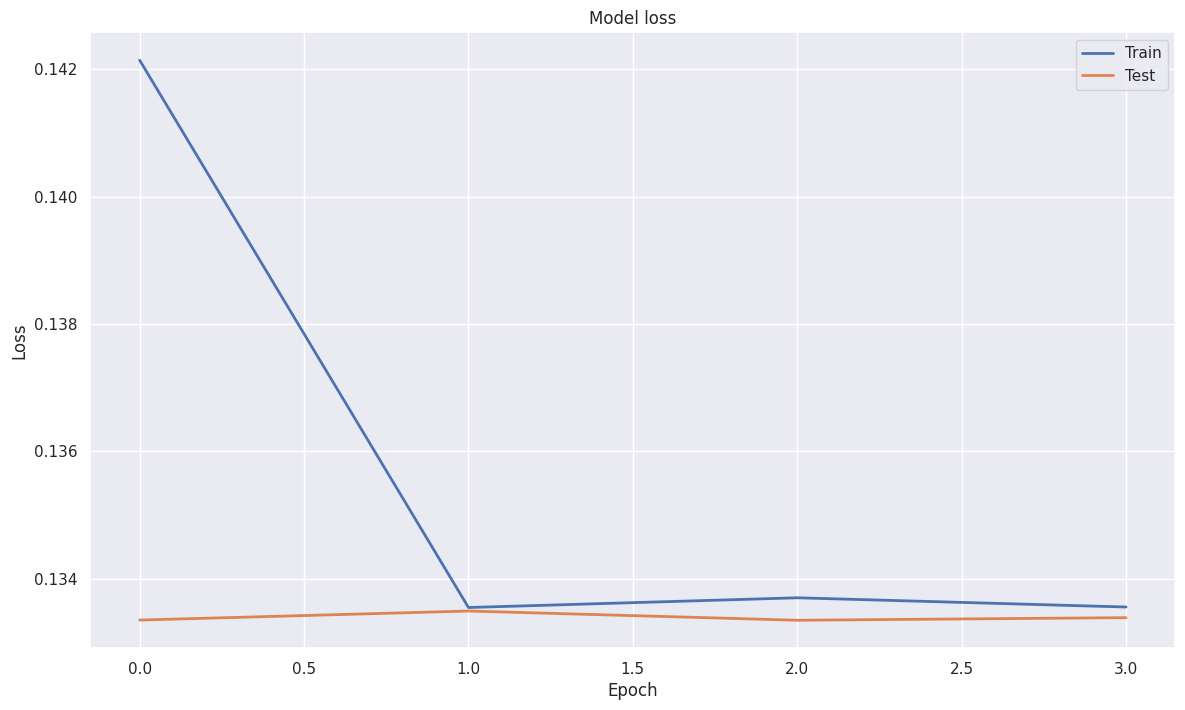

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

**Recall vs. Precision Thresholding**

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

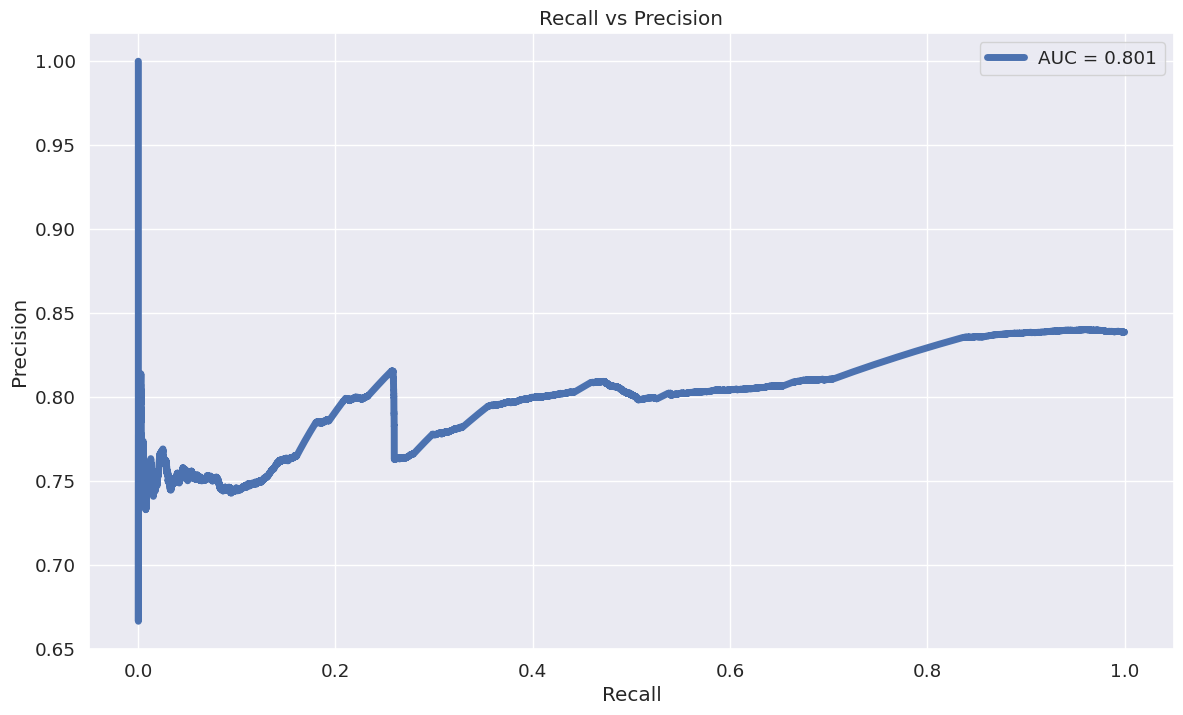

In [ ]:
# calculates precision/recall using reconstruction error as the decision function
# returns:
# precision_rt: Precision values such that element i is the precision of predictions with
#               score >= thresholds[i] and the last element is 1.
# recall_rt: Decreasing recall values such that element i is the recall of predictions with
#           score >= thresholds[i] and the last element is 0.
# threshold_rt = Increasing thresholds on the decision function used to compute
#                precision and recall.
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class,
                                                               error_df.Reconstruction_error)

pr_auc = auc(recall_rt, precision_rt,)

plt.figure(figsize=(14, 8))
plt.plot(recall_rt, precision_rt, linewidth=5, label='AUC = %0.3f'% pr_auc)
plt.legend(loc='upper right')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

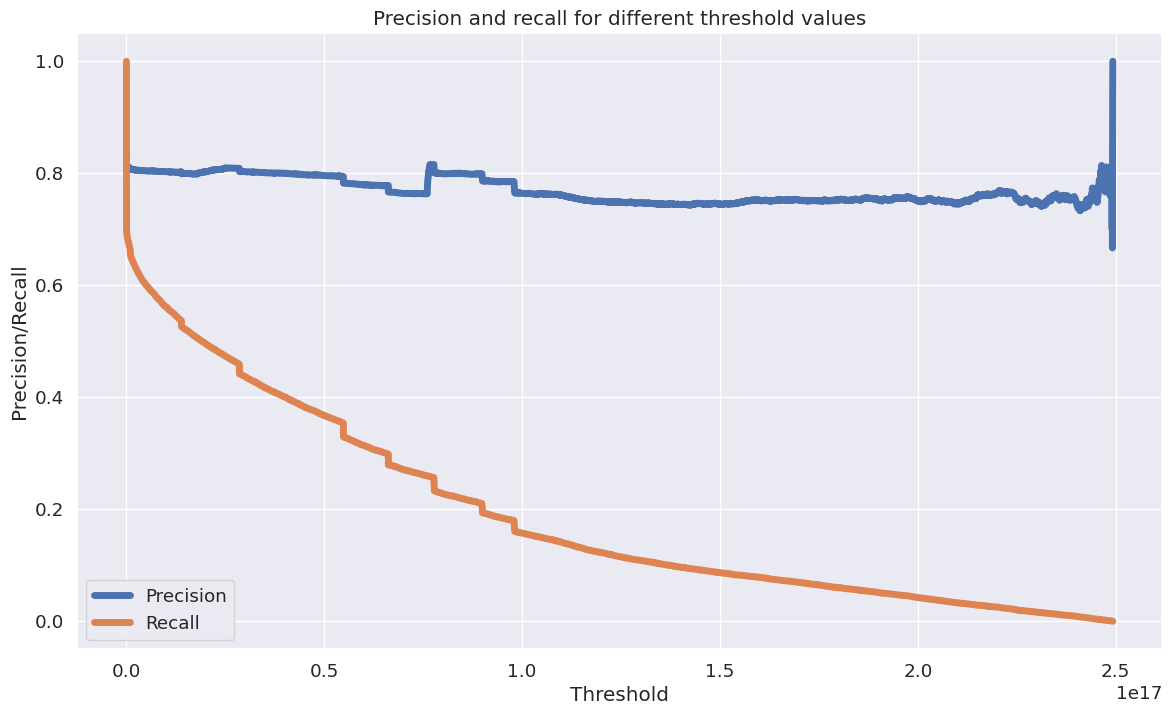

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

**Reconstruction Error vs Threshold Check**

**Confusion Matrix**

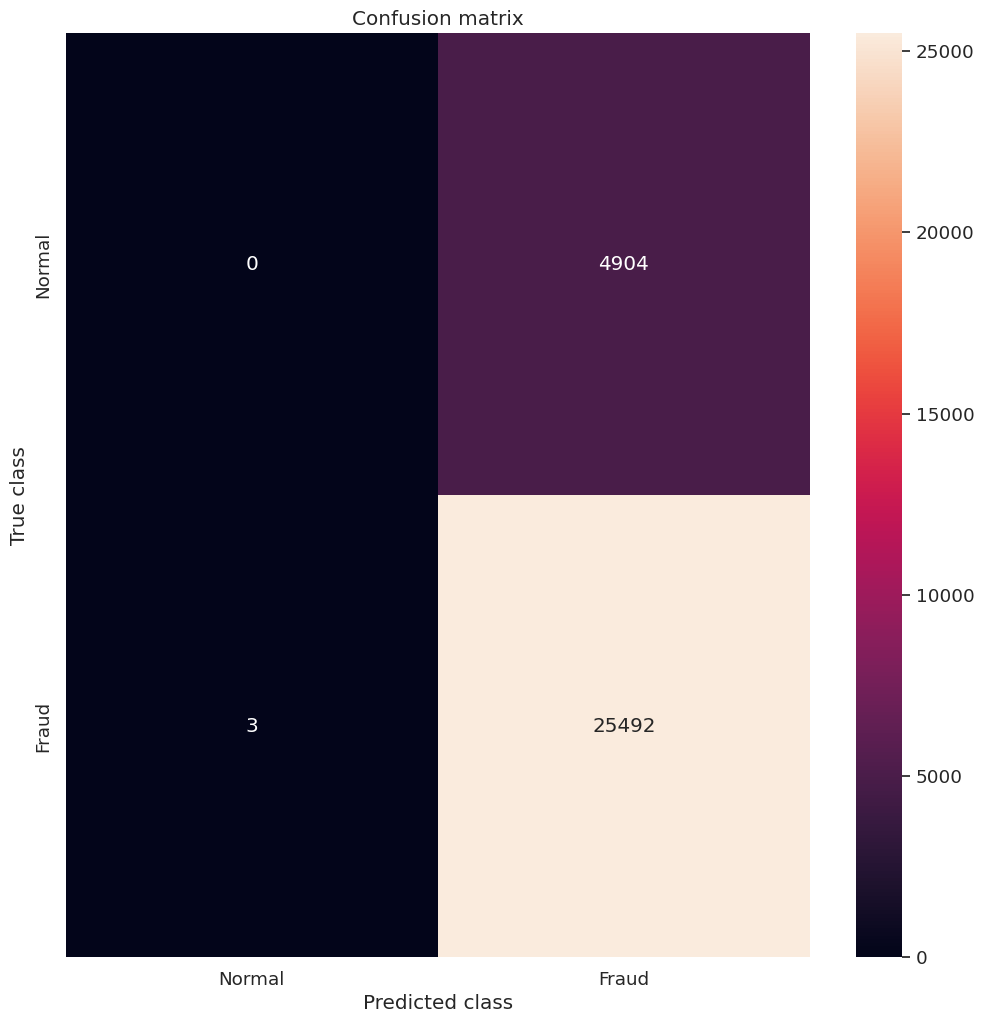

In [ ]:
 #As with autoencoders, it is the assumption that fraud or anomalies will suffer
# from a detectably high reconstruction error, predicting class as 1 (Fraud)
# if reconstruction error is greater than threshold
#rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Normal","Fraud"]
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

**Multilayer Perceptron (MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# We define the model
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000, random_state=42)

# We train model
start_time=time.time()
mlp.fit(x_train, y_train)
end_time=time.time()
training_time=end_time - start_time
print("time complexity :{:.3f} ".format(training_time))

# We predict target values
prediction = mlp.predict(x_test)

time complexity :997.400 


In [ ]:
#start_time=time.time()
#test_acc_mlp = round(mlp.fit(x_train,y_train).score(x_test, y_test)* 100, 2)
#train_acc_mlp = round(mlp.fit(x_train, y_train).score(x_train, y_train)* 100, 2)
#end_time=time.time()
#training_time=end_time - start_time
#print("time complexity :{:.3f} ".format(training_time))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

# Convert predict to a binary label array



# Calculate the confusion matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, prediction))

[[276319      5]
 [ 70731  38127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89    276324
           1       1.00      0.35      0.52    108858

    accuracy                           0.82    385182
   macro avg       0.90      0.68      0.70    385182
weighted avg       0.85      0.82      0.78    385182



In [ ]:
num_classes = cm.shape[0]

# Initialize arrays to store results
true_negatives = np.zeros(num_classes, dtype=int)
false_negatives = np.zeros(num_classes, dtype=int)
true_positives = np.zeros(num_classes, dtype=int)
false_positives = np.zeros(num_classes, dtype=int)

# Calculate TN, FN, TP, FP for each class
for i in range(num_classes):
    # True Negatives (TN) for class i
    mask = np.ones(num_classes, dtype=bool)
    mask[i] = False
    true_negatives[i] = np.sum(cm[mask][:, mask])

    # False Negatives (FN) for class i
    false_negatives[i] = np.sum(cm[i, :]) - cm[i, i]

    # True Positives (TP) for class i
    true_positives[i] = cm[i, i]

    # False Positives (FP) for class i
    false_positives[i] = np.sum(cm[:, i]) - cm[i, i]

# Calculate False Alarm Rate (FAR) for each class
false_alarm_rate = false_positives / (false_positives + true_negatives)

# Calculate total False Alarm Rate (FAR)
total_false_alarm_rate = np.sum(false_positives) / np.sum(false_positives + true_negatives)

# Print results
print("True Negatives for each class:", true_negatives)
print("False Negatives for each class:", false_negatives)
print("True Positives for each class:", true_positives)
print("False Positives for each class:", false_positives)
print("False Alarm Rate (FAR) for each class:", false_alarm_rate)
print("Total False Alarm Rate (FAR) for all classes combined:", total_false_alarm_rate)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
MSE =mean_squared_error(y_test, prediction)
print('GRU MSE',MSE)

    #Root Mean squared error
RMSE = math.sqrt(MSE)
print('GRU RMSE',RMSE)

    #Mean absolute error
MAE =mean_absolute_error(y_test, prediction)
print('GRU MAE',MAE)

GRU MSE 0.18364305704835637
GRU RMSE 0.42853594603995165
GRU MAE 0.18364305704835637


**Confusion matrix**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

**Comparison of ML Models**

<ipython-input-30-1c5f8ef2bc7d>:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


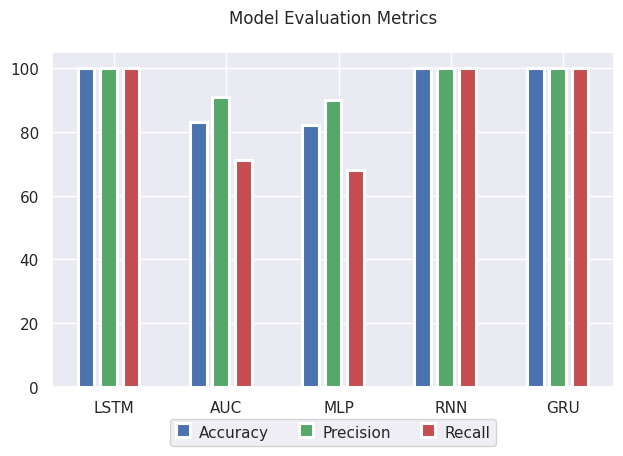

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Performance measures for each model and class
models = ['LSTM', 'AUC' , 'MLP', 'RNN', 'GRU']
accuracy = [100, 83, 82, 100, 100]
precision = [100, 91, 90, 100, 100]
recall = [100, 71, 68, 100, 100]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width + 0.05 for x in r1]
r3 = [x + 2*bar_width + 0.1 for x in r1]
r4 = [x + 3*bar_width + 0.15 for x in r1]  # Adjust the offset here

# Create the bar chart
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='white', linewidth=2.2, label='Accuracy')
plt.bar(r2, precision, width=bar_width, color='g', edgecolor='white', linewidth=2.2, label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='white', linewidth=2.2, label='Recall')

# Add x-axis labels and tick labels
plt.xlabel('')
plt.ylabel('')
plt.title('Model Evaluation Metrics\n')

# Customize x-axis tick labels
plt.xticks(r1 + 1.5*bar_width + 0.025, models)  # Adjust the offset here

# Add a legend as a horizontal line below the plot
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, handlelength=1, handletextpad=0.5)

# Set the size of the bars in the legend to make them square
for handle in legend.legendHandles:
    handle.set_height(10)  # Adjust the size here
    handle.set_width(10)  # Adjust the size here

# Display the chart
plt.tight_layout()
plt.show()

**Hyper Parameter Tuning**

https://www.kaggle.com/code/essammohamed4320/intrusion-detection-system-with-ml-dl

https://www.kaggle.com/code/kamyarazar/stock-price-prediction-lstm-hyperparameter-tuning/input

https://www.kaggle.com/code/alishaangdembe/time-series-forecasting-lstm-hyperparameter-tune

https://www.kaggle.com/code/kamyarazar/stock-price-prediction-lstm-hyperparameter-tuning/notebook